# RACISM IDENTIFIER

###  Dataset I

In [22]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
pd.set_option('max_colwidth', 800)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
#loading dataset
d1=pd.read_csv('train.csv', index_col=[0])
d1.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [6]:
# checking how many no of rows and columns present in the dataset
d1.shape

(24783, 6)

In [7]:
# checking any null values present in the dataset
d1.isnull().sum()

count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [8]:
d1.columns

Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet'],
      dtype='object')

In [9]:
d1['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [10]:
# class label [0 - hate speech 1 - offensive language 2 - neither] 
# so i am taking hate speech and offensive language as 1 , neither as 0
z = {0 : 1, 1 : 1,  2 : 0}
d1['class'] = d1['class'].map(z)
d1.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [11]:
d1['class'].value_counts()

1    20620
0     4163
Name: class, dtype: int64

#### This shows us that the dataset is perfectly imbalnced dataset. So i am adding one more dataset to balance with the current dataset.

In [12]:
# dropping the unwanted columns in the dataset 
d1.drop(['count', 'hate_speech', 'offensive_language', 'neither'], axis = 1, inplace=True)
d1.head()

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [13]:
d1.rename(columns ={'class':'label'}, inplace = True)
d1.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


F:\anacondathree\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

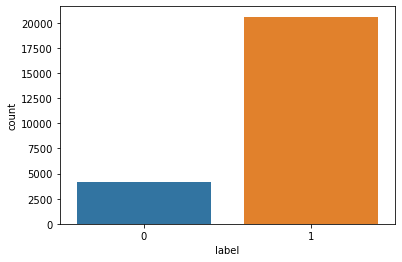

In [23]:
import seaborn as sns
sns.countplot('label',data=d1)

### Dataset II

In [14]:
## importing another dataset (racism tweet classification)
d2 = pd.read_csv('train1.csv')
d2.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [15]:
# checking the no of rows and columns in the dataset                            
d2.shape

(31962, 3)

In [16]:
# checking any null values present in the dataset
d2.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [17]:
# dropping the unwanted columns in the dataset [id - which is unique for each rows so dropping it]
d2.drop(['id'], axis=1, inplace=True)
d2.head()

,label,tweet
0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,0,bihday your majesty
3,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,0,factsguide: society now #motivation


In [18]:
d2['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

F:\anacondathree\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

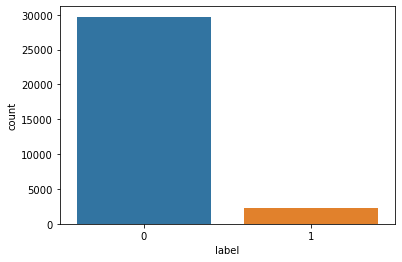

In [24]:
sns.countplot('label',data=d2)

In [19]:
frame = [d1, d2]
df = pd.concat(frame)
df.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [20]:
df.shape

(56745, 2)

In [21]:
df['label'].value_counts()

0    33883
1    22862
Name: label, dtype: int64

F:\anacondathree\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

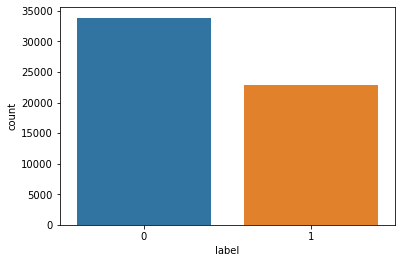

In [25]:
sns.countplot('label',data=df)

In [28]:
# Cleaning Raw tweets
def clean_text(text):
    
    #remove emails
    text = ' '.join([i for i in text.split() if '@' not in i])
    
    #remove web address
    text = re.sub('http[s]?://\S+', '', text)

    #remove punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    
    #Filter to allow only alphabets
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    #remove double spaces 
    text = re.sub('\s+', ' ', text)
    
    return text

In [29]:
df["clean_tweet"] = df['tweet'].apply(lambda x: clean_text(x))
df['clean_tweet'] = df['clean_tweet'].str.replace('RT', '')
df.head(10)

,label,tweet,clean_tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,As a woman you shouldn t complain about cleaning up your house amp as a man you should always take the trash out
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats cold tyga dwn bad for cuffin dat hoe in the st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,Dawg You ever fuck a bitch and she start to cry You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,The shit you hear about me might be true or it might be faker than the bitch who told it to ya
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",The shit just blows me claim you so faithful and down for somebody but still fucking with hoes
6,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""",I can not just sit up and HATE on another bitch I got too much shit going on
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,cause I m tired of you big bitches coming for us skinny girls
8,1,""" &amp; you might not get ya bitch back &amp; thats that """,amp you might not get ya bitch back amp thats that
9,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",hobbies include fighting Mariam bitch


In [30]:
# dropping the uncleaned text column "tweet"
df = df.drop(['tweet'], axis=1)

In [31]:
# renaming the column clean_tweet to 'tweet
df.rename(columns = {'clean_tweet':'tweet'}, inplace = True)

In [32]:
df.to_csv('data.csv', index=False)

In [33]:
# preprocessing the data (removing stopwords, cconverting the words into meaningful representation using lemmatization)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()
corpus=[]
def clean_text(review):
  review = review.lower()
  review = review.split()
  review = [wnl.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
  review = ' '.join(review)
  return review

In [34]:
df['tweet']=df['tweet'].apply(clean_text)

In [35]:
df.head()

,label,tweet
0,0,woman complain cleaning house amp man always take trash
1,1,boy dat cold tyga dwn bad cuffin dat hoe st place
2,1,dawg ever fuck bitch start cry confused shit
3,1,look like tranny
4,1,shit hear might true might faker bitch told ya


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=1000)
x=cv.fit_transform(df['tweet']).toarray()

MemoryError: Unable to allocate 433. MiB for an array with shape (56745, 1000) and data type float64

In [42]:
y=df['label']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [44]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

MemoryError: Unable to allocate 346. MiB for an array with shape (45396, 1000) and data type float64

In [46]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB(alpha=1.0)
clf.fit(x, y)
#y_pred=clf.predict(x_test)

MultinomialNB()

In [47]:
clf.score(x,y)

0.9062648691514671

In [48]:
import pickle
pickle.dump(cv, open('tfidf.pkl', 'wb'))   

In [49]:
pickle.dump(clf, open('model.pkl', 'wb'))

In [51]:
test = 'This group of chinks on the bus fucking wreak'
data = [test]
fact = cv.transform(data).toarray()
pred = clf.predict(fact)
print("pred", pred)
if (int(pred)==1):
    print("hate")
else:
    print("no hate and abusive")

pred [1]
hate
